In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('D:/datatrained/week2/covid.csv')

In [4]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [7]:
data.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [10]:
data.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

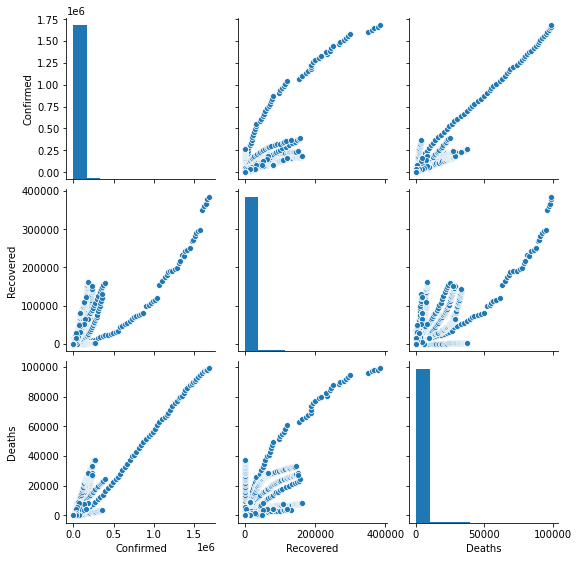

In [11]:
sns.pairplot(data)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Country']=le.fit_transform(data['Country'])
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0
...,...,...,...,...,...
23683,2020-05-26,183,429,365,3
23684,2020-05-26,184,9,6,1
23685,2020-05-26,185,249,10,49
23686,2020-05-26,186,920,336,7


In [13]:
data.drop(['Date'],axis=1,inplace=True)

In [14]:
data

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
23683,183,429,365,3
23684,184,9,6,1
23685,185,249,10,49
23686,186,920,336,7


In [15]:
data.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [16]:
x=data.iloc[:,0:3]
x

,Country,Confirmed,Recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
23683,183,429,365
23684,184,9,6
23685,185,249,10
23686,186,920,336


In [17]:
y=data.iloc[:,3:4]
y

,Deaths
0,0
1,0
2,0
3,0
4,0
...,...
23683,3
23684,1
23685,49
23686,7


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
max=0
for i in range(0,23689):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.80,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    scr=lm.score(x_train,y_train)
    if scr>max:
        max=scr
        final_state=i
print('score coreesponding to ',i,'is',lm.score(x_train,y_train))


score coreesponding to  23688 is 0.8927655210166926


In [23]:
pred=lm.predict(x_test)

In [24]:
pred

array([[4.03230278e+01],
       [3.56617084e+01],
       [1.38661747e+02],
       ...,
       [6.75514826e+00],
       [1.51876538e+04],
       [5.61821985e+01]])

In [26]:
scr=r2_score(y_test,pred)

In [27]:
scr

0.852915377448315

In [29]:
df=pd.DataFrame(pred)
df.to_csv('corona_pred.csv')